🧬 Seasonal Disease Pattern Analysis (2009–2022)

This notebook checks how diseases change with seasons across India, based on health records from government official sources.
It also shows the disease pattern from the year 2009.
It shows what illnesses pop up most each season while pointing out the hardest-hit states.




Author:alisha khan

Tool Used: Google Colab

Date: novermber 2025

# Data Import

In [11]:
import pandas as pd
df = pd.read_csv("/content/Untitled spreadsheet - disease_pattern_weka_clean.csv")
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp,season
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160.0,NaN,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333,Winter
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7.0,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000,Winter
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8.0,NaN,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667,Winter
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7.0,NaN,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000,Winter
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14.0,NaN,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000,Winter


# Data Cleaning

In [12]:
df = df.dropna(subset=['Disease', 'Cases', 'Deaths'])

df['year'] = df['year'].astype(int)
df['mon'] = df['mon'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2554 entries, 1 to 8984
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2554 non-null   int64  
 1   week_of_outbreak  2554 non-null   object 
 2   state_ut          2554 non-null   object 
 3   district          2554 non-null   object 
 4   Disease           2554 non-null   object 
 5   Cases             2554 non-null   float64
 6   Deaths            2554 non-null   float64
 7   day               2554 non-null   int64  
 8   mon               2554 non-null   int64  
 9   year              2554 non-null   int64  
 10  Latitude          2554 non-null   float64
 11  Longitude         2554 non-null   float64
 12  preci             2526 non-null   float64
 13  LAI               1949 non-null   float64
 14  Temp              2273 non-null   float64
 15  season            2554 non-null   object 
dtypes: float64(7), int64(4), object(5)
memory usage

# Data Exploration

visualizing the data

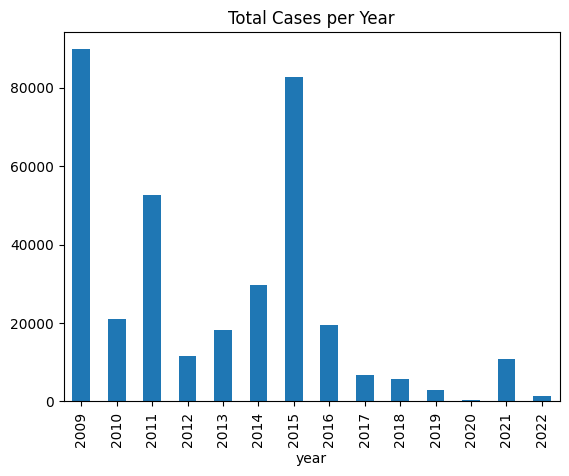

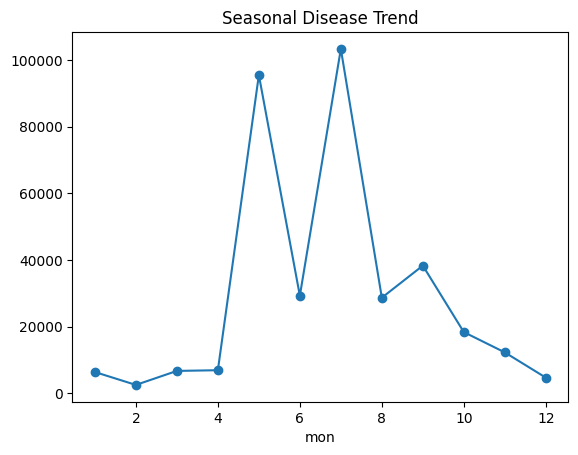

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cases_by_year = df.groupby('year')['Cases'].sum()
cases_by_year.plot(kind='bar', title='Total Cases per Year')
plt.show()

cases_by_month = df.groupby('mon')['Cases'].sum()
cases_by_month.plot(kind='line', marker='o', title='Seasonal Disease Trend')
plt.show()

season classification

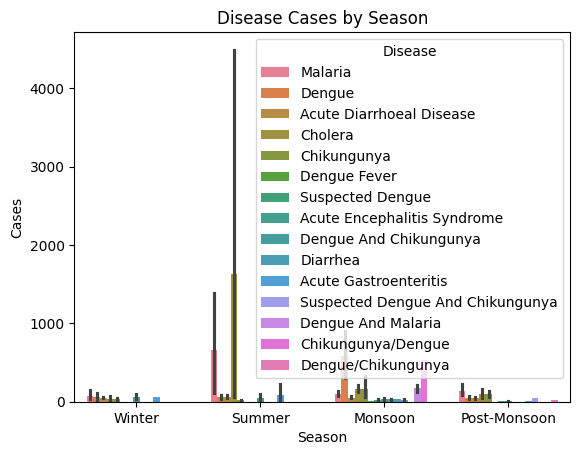

In [14]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['Season'] = df['mon'].apply(get_season)

sns.barplot(data=df, x='Season', y='Cases', hue='Disease')
plt.title('Disease Cases by Season')
plt.show()


data summary

In [15]:
import numpy as np

total_cases = df['Cases'].sum()
total_deaths = df['Deaths'].sum()
unique_diseases = df['Disease'].nunique()
years_covered = df['year'].nunique()

top_disease = df.groupby('Disease')['Cases'].sum().idxmax()
top_disease_cases = df.groupby('Disease')['Cases'].sum().max()

season_summary = df.groupby('Season')['Cases'].sum().sort_values(ascending=False)
most_active_season = season_summary.idxmax()

avg_cases = int(df.groupby('year')['Cases'].sum().mean())

print("📊 --- DATA SUMMARY ---")
print(f"Total records analyzed: {len(df)}")
print(f"Years covered: {years_covered}")
print(f"Unique diseases: {unique_diseases}")
print(f"Total reported cases: {total_cases:,}")
print(f"Total deaths: {total_deaths:,}")
print(f"Average cases per year: {avg_cases:,}")
print("\nMost common disease:", top_disease, f"({top_disease_cases:,} cases)")
print("Season with highest cases:", most_active_season)
print("\n📈 Seasonal Breakdown (Cases):")
print(season_summary)
print("\n✅ CONCLUSION:")

if most_active_season == 'Monsoon':
    print(f"Most diseases peak during the {most_active_season.lower()} season, likely due to increased humidity and rainfall.")
elif most_active_season == 'Summer':
    print(f"Major outbreaks occur in {most_active_season.lower()} months, possibly linked to water-borne or heat-related diseases.")
elif most_active_season == 'Winter':
    print(f"Winter months see higher cases, possibly from respiratory diseases.")
else:
    print(f"{most_active_season} shows the highest disease activity, suggesting post-season effects on disease spread.")

print(f"\nThe data indicates that '{top_disease}' is the most frequently occurring disease in the analyzed years.")
print("Further study could explore correlations with temperature, rainfall, and state-wise trends.")

📊 --- DATA SUMMARY ---
Total records analyzed: 2554
Years covered: 14
Unique diseases: 15
Total reported cases: 352,901.0
Total deaths: 4,047.0
Average cases per year: 25,207

Most common disease: Dengue (110,475.0 cases)
Season with highest cases: Monsoon

📈 Seasonal Breakdown (Cases):
Season
Monsoon         199517.0
Summer          109100.0
Post-Monsoon     30648.0
Winter           13636.0
Name: Cases, dtype: float64

✅ CONCLUSION:
Most diseases peak during the monsoon season, likely due to increased humidity and rainfall.

The data indicates that 'Dengue' is the most frequently occurring disease in the analyzed years.
Further study could explore correlations with temperature, rainfall, and state-wise trends.


summary with state-wise insights

In [16]:

import numpy as np
import pandas as pd

total_cases = df['Cases'].sum()
total_deaths = df['Deaths'].sum()
unique_diseases = df['Disease'].nunique()
years_covered = df['year'].nunique()

top_disease = df.groupby('Disease')['Cases'].sum().idxmax()
top_disease_cases = df.groupby('Disease')['Cases'].sum().max()

season_summary = df.groupby('Season')['Cases'].sum().sort_values(ascending=False)
most_active_season = season_summary.idxmax()

state_summary = df.groupby('state_ut')['Cases'].sum().sort_values(ascending=False)
top_states = state_summary.head(3)

top_state = top_states.index[0]
top_state_disease = (
    df[df['state_ut'] == top_state]
    .groupby('Disease')['Cases']
    .sum()
    .sort_values(ascending=False)
    .idxmax()
)

avg_cases = int(df.groupby('year')['Cases'].sum().mean())

print("📊 --- DATA SUMMARY ---")
print(f"Total records analyzed: {len(df)}")
print(f"Years covered: {years_covered}")
print(f"Unique diseases: {unique_diseases}")
print(f"Total reported cases: {total_cases:,}")
print(f"Total deaths: {total_deaths:,}")
print(f"Average cases per year: {avg_cases:,}")

print("\n🦠 Most Common Disease:")
print(f"{top_disease} ({top_disease_cases:,} total cases)")

print("\n🌦️ Season with Highest Disease Activity:")
print(f"{most_active_season} ({season_summary[0]:,} cases)")

print("\n📍 Top 3 Most Affected States:")
for i, (state, cases) in enumerate(top_states.items(), start=1):
    print(f"{i}. {state} — {cases:,} cases")

print("\n🏥 In", top_state + ", the most common disease is", top_state_disease)

print("\n📈 Seasonal Breakdown (Total Cases):")
print(season_summary)

print("\n✅ CONCLUSION:")
if most_active_season == 'Monsoon':
    print(f"Most diseases peak during the {most_active_season.lower()} season, likely due to humidity and stagnant water.")
elif most_active_season == 'Summer':
    print(f"Outbreaks are highest in {most_active_season.lower()} months, possibly due to water-borne or heat-related illnesses.")
elif most_active_season == 'Winter':
    print(f"Winter months show more respiratory or viral infections.")
else:
    print(f"{most_active_season} shows the highest activity, suggesting post-season transitions affect disease spread.")

print(f"\n'{top_disease}' is the most widespread disease across India, especially dominant in {top_state}.")
print("States like", ", ".join(top_states.index.tolist()), "contribute heavily to the total case count.")
print("Further analysis can link rainfall, temperature, and geography to these regional patterns.")

📊 --- DATA SUMMARY ---
Total records analyzed: 2554
Years covered: 14
Unique diseases: 15
Total reported cases: 352,901.0
Total deaths: 4,047.0
Average cases per year: 25,207

🦠 Most Common Disease:
Dengue (110,475.0 total cases)

🌦️ Season with Highest Disease Activity:
Monsoon (199,517.0 cases)

📍 Top 3 Most Affected States:
1. West Bengal — 93,847.0 cases
2. Delhi — 69,977.0 cases
3. Tripura — 23,737.0 cases

🏥 In West Bengal, the most common disease is Cholera

📈 Seasonal Breakdown (Total Cases):
Season
Monsoon         199517.0
Summer          109100.0
Post-Monsoon     30648.0
Winter           13636.0
Name: Cases, dtype: float64

✅ CONCLUSION:
Most diseases peak during the monsoon season, likely due to humidity and stagnant water.

'Dengue' is the most widespread disease across India, especially dominant in West Bengal.
States like West Bengal, Delhi, Tripura contribute heavily to the total case count.
Further analysis can link rainfall, temperature, and geography to these regional

/tmp/ipython-input-4012313726.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{most_active_season} ({season_summary[0]:,} cases)")


state season heatmap

/tmp/ipython-input-3000597183.py:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


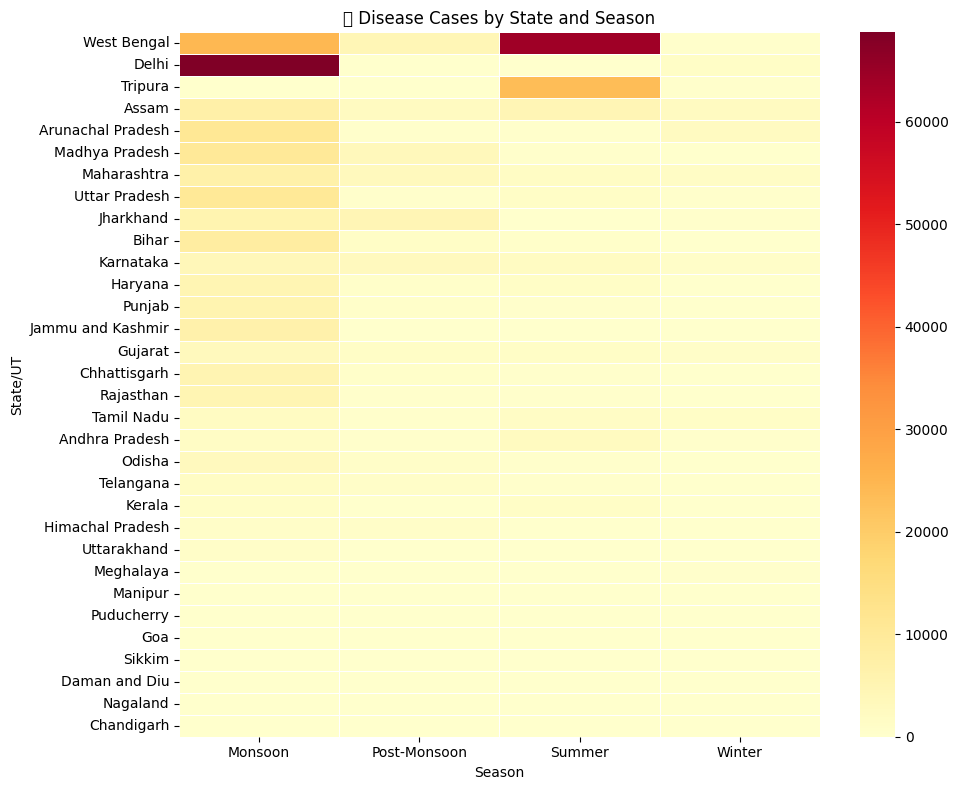

Season,Monsoon,Post-Monsoon,Summer,Winter
state_ut,,,,
West Bengal,24667.0,4463.0,64267.0,450.0
Delhi,68722.0,0.0,0.0,1255.0
Tripura,0.0,15.0,23421.0,301.0
Assam,7225.0,2377.0,4777.0,2407.0
Arunachal Pradesh,10998.0,516.0,284.0,2408.0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(
    values='Cases',
    index='state_ut',
    columns='Season',
    aggfunc='sum',
    fill_value=0
)

pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, linewidths=0.5)
plt.title('🔥 Disease Cases by State and Season')
plt.xlabel('Season')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()

pivot_table.head()

# Pattern Extraction

seasonal trend pattern

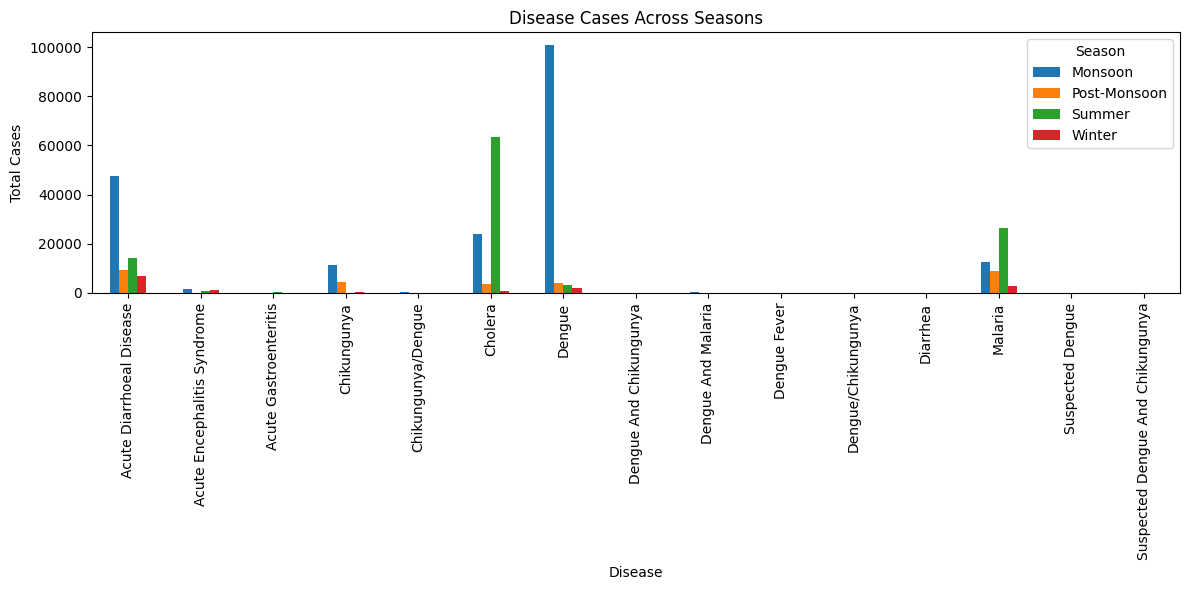

In [20]:
pattern_season = df.groupby(['Disease', 'Season'])['Cases'].sum().unstack().fillna(0)

pattern_season.plot(kind='bar', figsize=(12,6))
plt.title('Disease Cases Across Seasons')
plt.ylabel('Total Cases')
plt.xlabel('Disease')
plt.tight_layout()
plt.show()

correlation with temperature

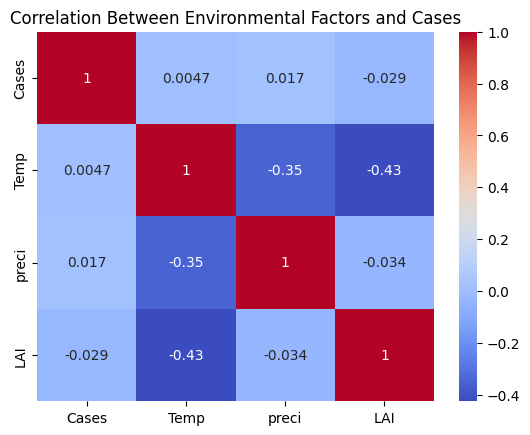

In [21]:
corr = df[['Cases', 'Temp', 'preci', 'LAI']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Environmental Factors and Cases')
plt.show()

yearly trend pattern


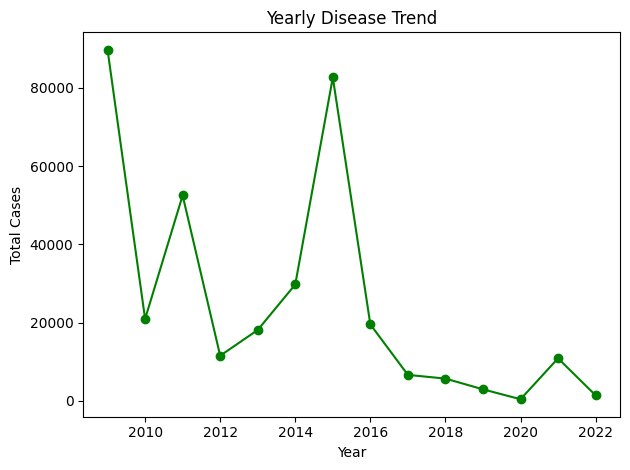

In [22]:
yearly_trend = df.groupby('year')['Cases'].sum()

yearly_trend.plot(marker='o', color='green', title='Yearly Disease Trend')
plt.ylabel('Total Cases')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# Summary and Conclusion

clustering disease by seasonal behavior

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pattern = df.groupby(['Disease', 'Season'])['Cases'].sum().unstack().fillna(0)
X = StandardScaler().fit_transform(pattern)

kmeans = KMeans(n_clusters=3, random_state=42)
pattern['Cluster'] = kmeans.fit_predict(X)
pattern.head()

Season,Monsoon,Post-Monsoon,Summer,Winter,Cluster
Disease,,,,,
Acute Diarrhoeal Disease,47462.0,9253.0,14317.0,6795.0,2
Acute Encephalitis Syndrome,1713.0,29.0,965.0,1019.0,1
Acute Gastroenteritis,191.0,10.0,263.0,59.0,1
Chikungunya,11412.0,4616.0,166.0,400.0,1
Chikungunya/Dengue,538.0,0.0,0.0,0.0,1


summary of key patterns

In [24]:
top_disease = df.groupby('Disease')['Cases'].sum().idxmax()
top_season = df.groupby('Season')['Cases'].sum().idxmax()
top_state = df.groupby('state_ut')['Cases'].sum().idxmax()

print("🩺 Most reported disease:", top_disease)
print("🌦️ Peak season:", top_season)
print("📍 Most affected state:", top_state)

🩺 Most reported disease: Dengue
🌦️ Peak season: Monsoon
📍 Most affected state: West Bengal
